### Importing library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading file data

In [3]:
df_loan = pd.read_csv('loan.csv',low_memory=False)
df_loan.shape

(39717, 111)

## Data Cleansing

In [4]:
#Data Cleaning - Fix rows and columns
#Validation 1: Incorrect rows & Summary rows
#Observation: There is no Header, Footer, Total and sub total rows.
#df_loan.head()
df_loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Observation: There are no extra headers and footers

### Extra rows, Missing column names and Inconsistent column names

In [6]:
for col in df_loan.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

Observation: No Column name with numbers, indicators and blank column name. All column names exists in Data Dictionary.

In [7]:
df_loan.addr_state

0        AZ
1        GA
2        IL
3        CA
4        OR
         ..
39712    CO
39713    NC
39714    MA
39715    MD
39716    MA
Name: addr_state, Length: 39717, dtype: object

### Significant number of Missing values in a row/column and blank rows

In [8]:
df_loan.isnull().all(axis=1).sum()

0

Observation: No Blank rows and deleted columns where there is no data.

### Check for blank columns and delete them

In [9]:
df_loan.isnull().all(axis=0).sum()

54

In [10]:
#Remove Blank columns
df_loan=df_loan.dropna(axis=1,how='all')
df_loan.shape

(39717, 57)

### Remove unwanted columns

In [11]:
df_loan.isnull().sum()*100/len(df_loan.id)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Percentage of Null values in each columns

In [12]:
df_loan.zip_code

0        860xx
1        309xx
2        606xx
3        917xx
4        972xx
         ...  
39712    802xx
39713    274xx
39714    017xx
39715    208xx
39716    027xx
Name: zip_code, Length: 39717, dtype: object

In [13]:
#df_loan.desc --total descriptive column is not usefull for analysis
#df_loan.mths_since_last_delinq        
#df_loan.mths_since_last_record.value_counts()
#df_loan.next_pymnt_d.value_counts()      
df_loan=df_loan.drop(['next_pymnt_d','desc','url','zip_code','mths_since_last_delinq','mths_since_last_record','title'],axis=1)

In [14]:
df_loan.shape

(39717, 50)

In [15]:
#Check different values in columns if all values in column are unique then drop a column
df_loan.loc[:,df_loan.apply(pd.Series.nunique) == 1].columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [16]:
df_loan.drop(['pymnt_plan','emp_title','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1,inplace=True)

In [17]:
#df_loan[df_loan.duplicated('id')]
#df_loan[df_loan.duplicated('member_id')]
#both columns are total unique we need only one column out of these 2 columns for future analysis
df_loan.drop(['id','member_id'],axis=1,inplace=True)

In [18]:
df_loan.shape

(39717, 38)

### Check Missing Values and trying to fill partial missing values

In [19]:
#df_loan.isnull().sum()
#df_loan[df_loan.emp_title.isna()].head()
#df_loan[df_loan.emp_title.isna()][["title","loan_amnt","term","int_rate","emp_length","emp_title"]]
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
df_loan.isnull().sum()*100/len(df_loan.loan_status)

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0

In [21]:
df_loan = df_loan[~df_loan.emp_length.isnull()]

In [22]:
df_loan=df_loan[df_loan.loan_status!='Current']

In [23]:
df_loan.annual_inc = df_loan.annual_inc.apply(lambda x:int(x))

In [24]:
df_loan.int_rate= df_loan.int_rate.apply(lambda x:float(x[:-1]))

In [25]:
df_loan.issue_d=pd.to_datetime(df_loan.issue_d, format='%b-%y')


In [26]:
df_loan["issue_d_year"]=pd.DatetimeIndex(df_loan.issue_d).year

In [27]:
df_loan.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [28]:
df_loan.loan_amnt.describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [29]:
df_loan.loan_amnt.median()

10000.0

## Univariate/Segmented univariate Analysis

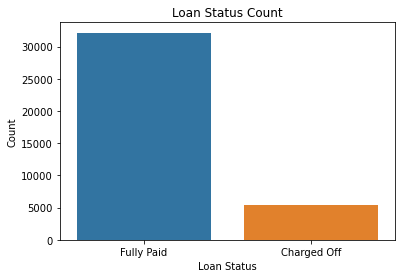

In [30]:
sns.countplot(x= df_loan["loan_status"])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Count')
plt.show()

Observation: Most of the loans are fully paid

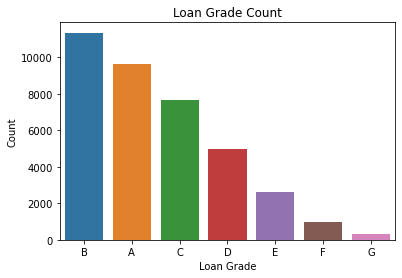

In [31]:
sns.countplot(x= 'grade', data= df_loan, order= df_loan['grade'].value_counts().index)
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Loan Grade Count')
plt.show()

Observation: All the loans are evenly distributed with decreasing order and largest in grade 'B'

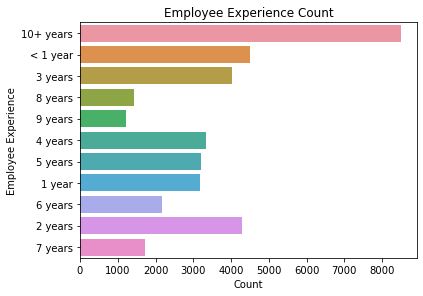

In [35]:
ax=sns.countplot(y= 'emp_length', data= df_loan)
plt.tight_layout()
plt.ylabel('Employee Experience')
plt.xlabel('Count')
plt.title('Employee Experience Count')
plt.show()

Observation: Most of the loan applicants are having more than 10 years of experience

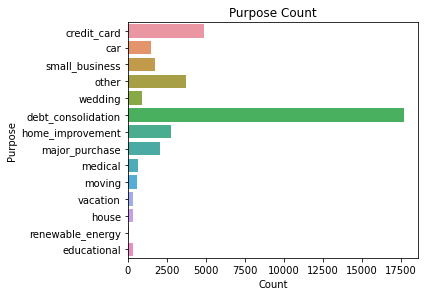

In [36]:
sns.countplot(y= 'purpose', data= df_loan)
plt.tight_layout()
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Purpose Count')
plt.show()

Observation: Most of the loan applicants are having purpose of debt consolidation

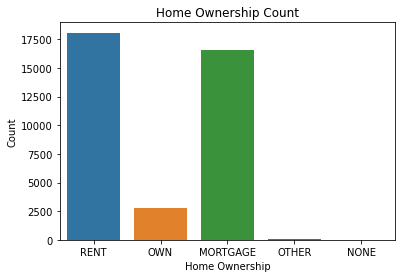

In [37]:
sns.countplot(x= df_loan["home_ownership"])
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership Count')
plt.show()

Observation: Most of the applicants are either living on rent or mortgaged

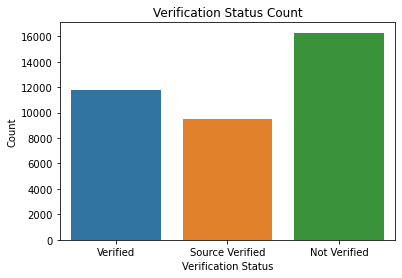

In [41]:
sns.countplot(x= df_loan["verification_status"])
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Verification Status Count')
plt.show()

## Bivariate Analysis

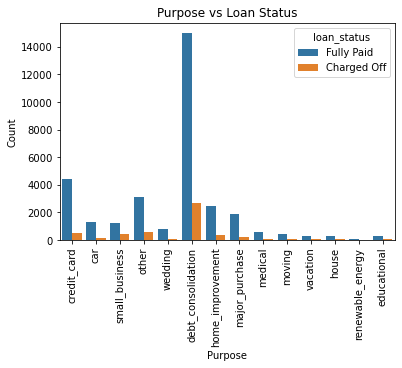

In [44]:
sns.countplot(x='purpose', hue="loan_status", data=df_loan)
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Purpose vs Loan Status')
plt.show()

Observation: loan applicats with purpose of debt consolidation have higher loans getting charged off

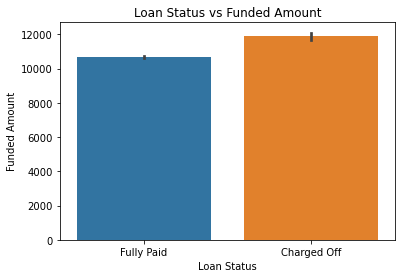

In [45]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_loan)
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount')
plt.title('Loan Status vs Funded Amount')
plt.show()

Observation: Risk of loans getting charged off increases with increase in funded amount

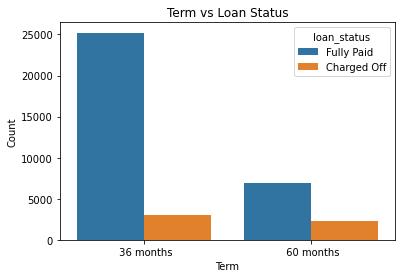

In [46]:
sns.countplot( x="term", hue='loan_status', data=df_loan)
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term vs Loan Status')
plt.show()

Observation: Loans having tenure of 60 months have a risky profile and have higher chance of getting charged off

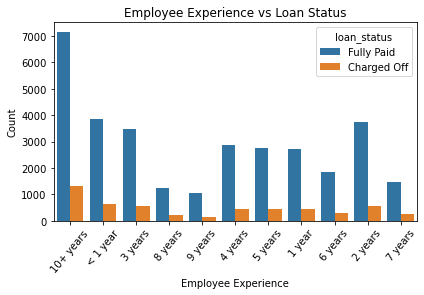

In [39]:
ax=sns.countplot(x='emp_length', hue='loan_status', data=df_loan)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.tight_layout()
plt.xlabel('Employee Experience')
plt.ylabel('Count')
plt.title('Employee Experience vs Loan Status')
plt.show()

Observation: loan applicants with 10+ years of experience have mostly paid their loans off

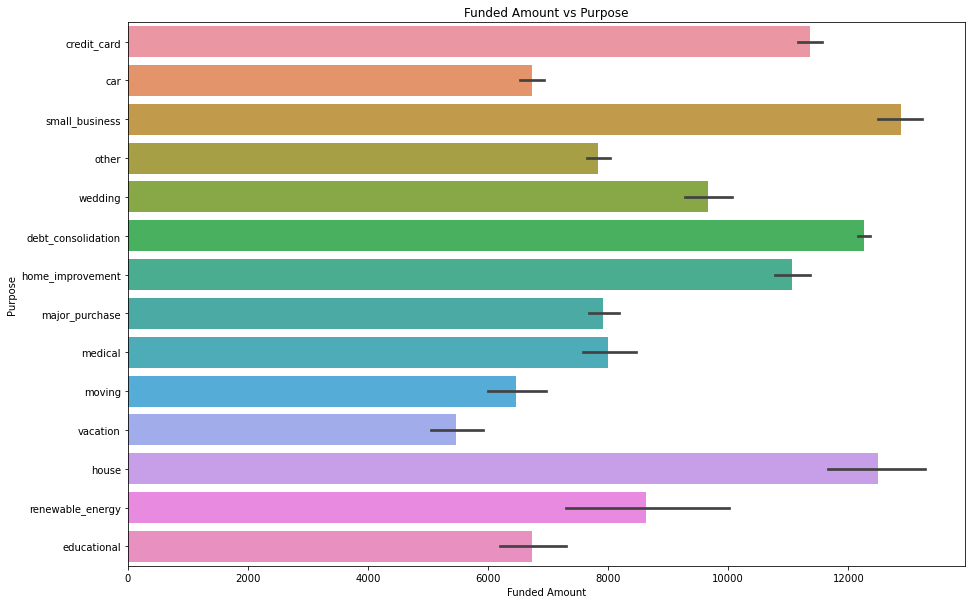

In [47]:
plt.figure(figsize=(15,10))
sns.barplot( y="purpose", x='funded_amnt', data=df_loan)
plt.xlabel('Funded Amount')
plt.ylabel('Purpose')
plt.title('Funded Amount vs Purpose')
plt.show()

Observation: Loans having purpose of home or small business got funded heavily. This means they are low risk categories.

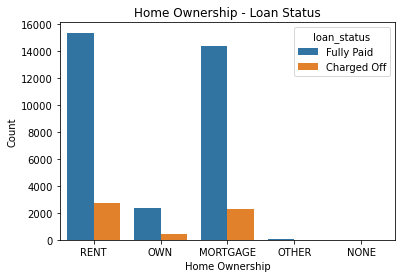

In [48]:
sns.countplot(x='home_ownership',hue='loan_status', data=df_loan)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership - Loan Status')
plt.show()

Observation: Loan applicants living under mortgaged have a slightly risky profile than those living on rent.

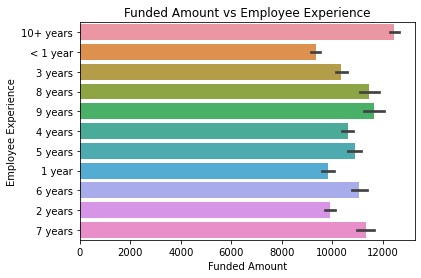

In [50]:
sns.barplot(x='funded_amnt',y='emp_length', data=df_loan)
plt.xlabel('Funded Amount')
plt.ylabel('Employee Experience')
plt.title('Funded Amount vs Employee Experience')
plt.show()

Observation: Employees having more than 10 years of experience got funded the most. 

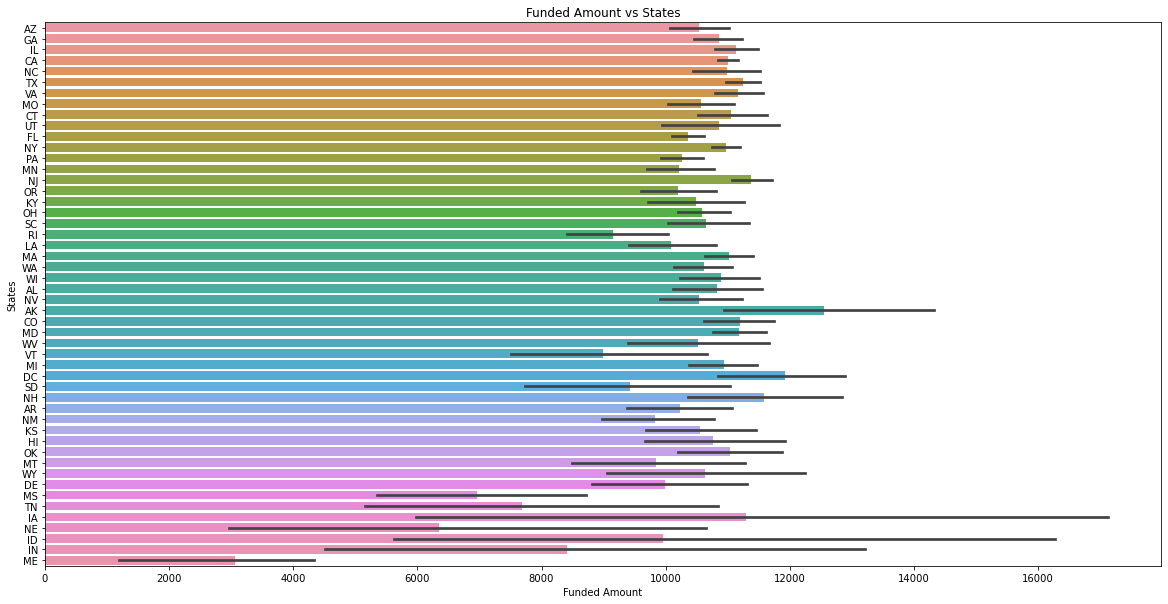

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(y='addr_state', x='funded_amnt', data=df_loan)
plt.xlabel('Funded Amount')
plt.ylabel('States')
plt.title('Funded Amount vs States')
plt.show()

Observation: Applicants from state 'IA' got funded most.

In [52]:
df_state_ChargedOff=df_loan[df_loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()

In [53]:
df_state_ChargedOff.head()

,addr_state,loan_status
0,AK,15
1,AL,51
2,AR,26
3,AZ,114
4,CA,1074


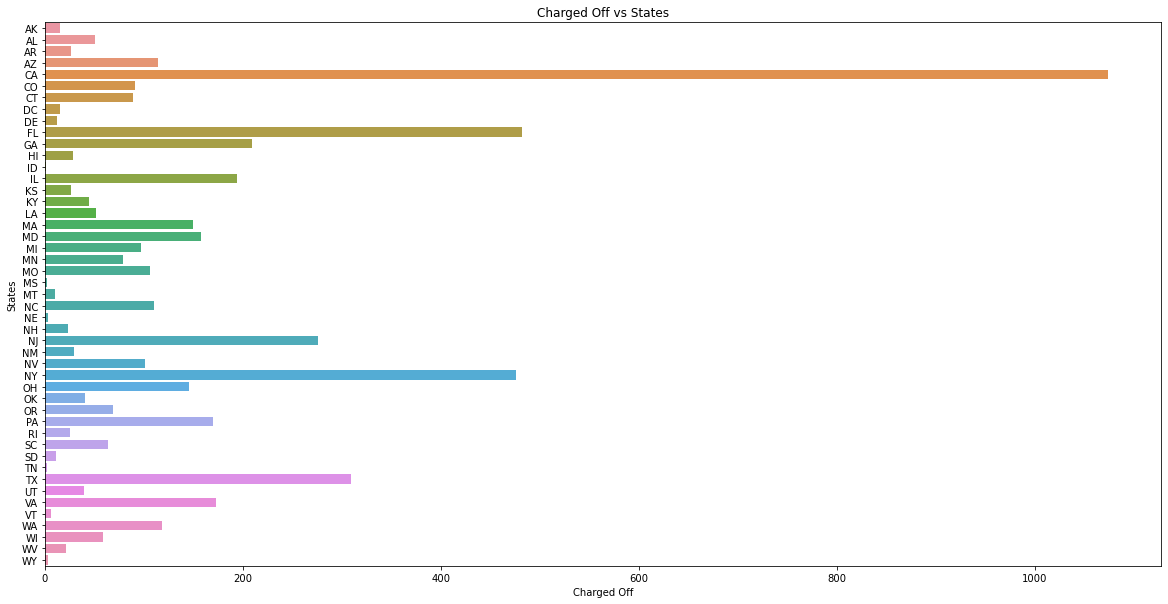

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(x='loan_status', y='addr_state', data=df_state_ChargedOff)
plt.xlabel('Charged Off')
plt.ylabel('States')
plt.title('Charged Off vs States')
plt.show()

Observation: Applicants from state 'CA' got their loans charged off the most

In [59]:
df_state_Paid=df_loan[df_loan['loan_status']!='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()

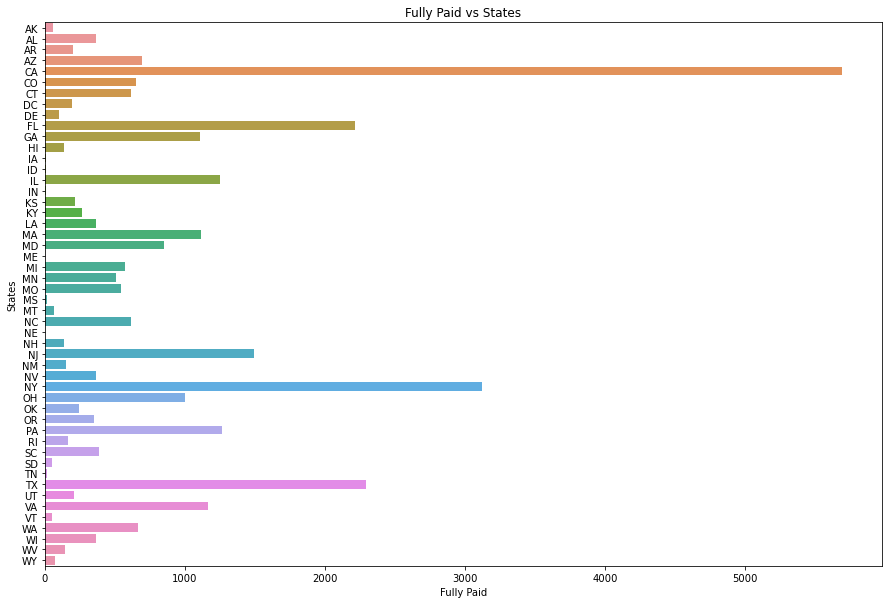

In [60]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status', y='addr_state', data=df_state_Paid)
plt.xlabel('Fully Paid')
plt.ylabel('States')
plt.title('Fully Paid vs States')
plt.show()

Observation: Applications from state 'CA' paid their loans the most

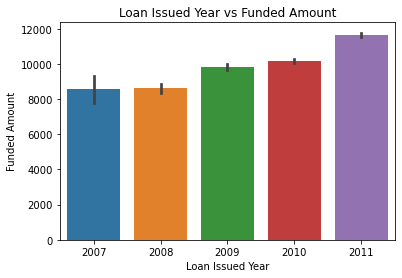

In [61]:
sns.barplot(x='issue_d_year', y='funded_amnt', data=df_loan)
plt.xlabel('Loan Issued Year')
plt.ylabel('Funded Amount')
plt.title('Loan Issued Year vs Funded Amount')
plt.show()

Observation: Funded loans are increased from 2007 to 2011. This means the lending is yielding profits.